# Differential equation solve ( Nonlinear dynamics and chaos )
Date: 14.01-2025

1D: Solution for the equation like 

$$ \frac{dx}{dt} = f(x,t) $$

can be solved using own custom Solvers (**Euler, RK4**) using `Numpy` or inbuilt library from `Scipy.integrate`

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.zeros([5,5], dtype = 'float64')
x

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

## Choosing the Best Method ( In Python )


In [9]:
from IPython.display import Image
Image(url="diff_slo_in_python.png") # recomended by chatgpt

## odeint

C:\Users\Dell\AppData\Local\Temp\ipykernel_9796\1447835750.py:10: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  soln = odeint(f,x0,t)


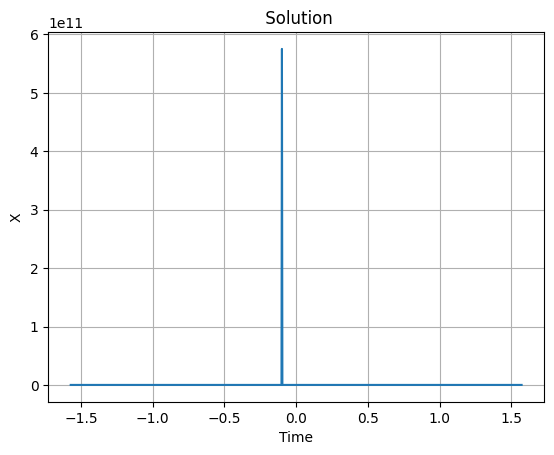

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt 

def f(x,t):
    return (1+x**(2))

t = np.linspace(-np.pi/2,np.pi/2,1000)
x0 = 0.1
soln = odeint(f,x0,t)

plt.plot(t,soln)
plt.title(" Solution")
plt.xlabel("Time")
plt.ylabel("X")
plt.grid()
plt.show()

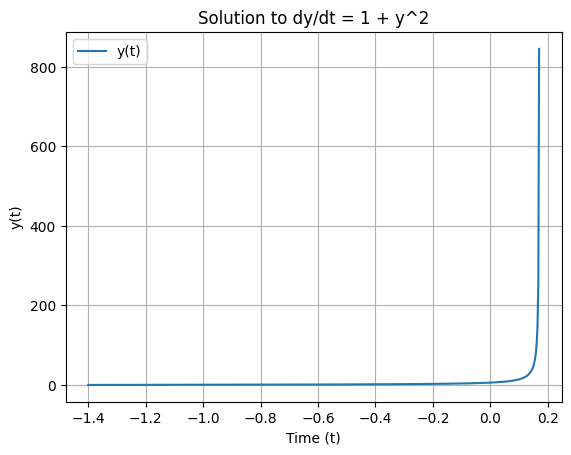

In [36]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the ODE: dy/dt = 1 + y^2
def model(t, y):
    return 1 + y**2

# Initial condition
y0 = [0]  # y(0) = 0
t_span = (-1.4, 1.4)  # Solve from t = -6 to t = 6
t_eval = np.linspace(-1.4, 1.4, 1000)  # Points at which to evaluate the solution

# Solve the ODE
solution = solve_ivp(model, t_span, y0, method='RK45', t_eval=t_eval)

# Plot the solution
plt.plot(solution.t, solution.y[0], label="y(t)")
plt.title("Solution to dy/dt = 1 + y^2")
plt.xlabel("Time (t)")
plt.ylabel("y(t)")
plt.grid()
plt.legend()
plt.show()


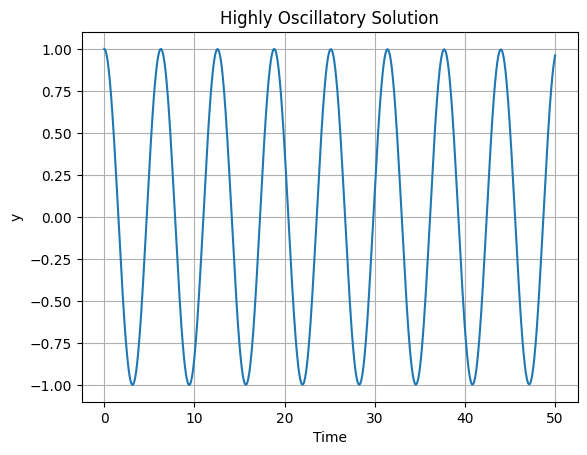

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def model(t, y):
    return [y[1], -y[0]]  # y'' = -y

y0 = [1, 0]  # Initial condition: y(0) = 1, y'(0) = 0
t_span = (0, 50)
t_eval = np.linspace(0, 50, 1000)

solution = solve_ivp(model, t_span, y0, method='DOP853', t_eval=t_eval)

plt.plot(solution.t, solution.y[0])
plt.title("Highly Oscillatory Solution")
plt.xlabel("Time")
plt.ylabel("y")
plt.grid()
plt.show()


## Sympy

 SymPy to solve the first-order ordinary differential equation 
$$ \frac{dy}{dt} = -y + t $$

In [2]:
from sympy import Function, dsolve, Eq, Derivative, symbols

# Define the variables and the function
t = symbols('t')  # Independent variable
y = Function('y')  # Dependent variable

# Define the differential equation: dy/dt = -y + t
eq = Eq(Derivative(y(t), t), -y(t) + t)

# Solve the differential equation
solution = dsolve(eq)

# Print the solution
print("The general solution to the ODE is:")
print(solution)

# Simplify and display the solution
from sympy import pprint
pprint(solution)


The general solution to the ODE is:
Eq(y(t), C1*exp(-t) + t - 1)
           -t        
y(t) = C₁⋅ℯ   + t - 1


In [35]:
from sympy import Function, dsolve, Eq, Derivative, symbols

# Define the variables and the function
t = symbols('t')  # Independent variable
y = Function('y')  # Dependent variable

# Define the differential equation: dy/dt = -y + t
eq = Eq(Derivative(y(t), t), 1+y(t)**2)

# Solve the differential equation
solution = dsolve(eq)

# Print the solution
print("The general solution to the ODE is:")
print(solution)

# Simplify and display the solution
from sympy import pprint
pprint(solution)


The general solution to the ODE is:
Eq(y(t), -tan(C1 - t))
y(t) = -tan(C₁ - t)


# 2nd order

# limitcycle
##### Set of equation is
 
 $$  \dot x = x (1-\sqrt(x^2+y^2)) -y  $$
 $$  \dot y = y (1-\sqrt(x^2+y^2)) +x  $$

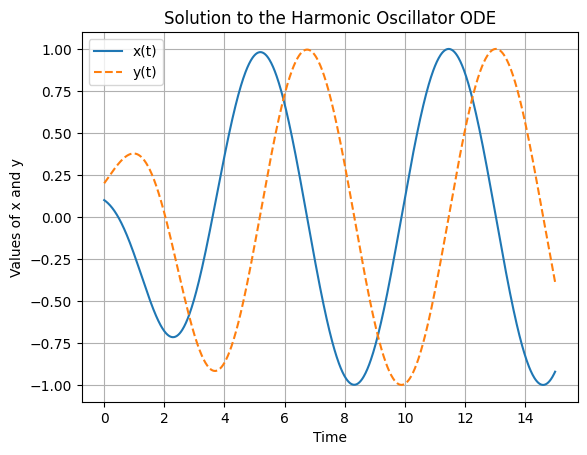

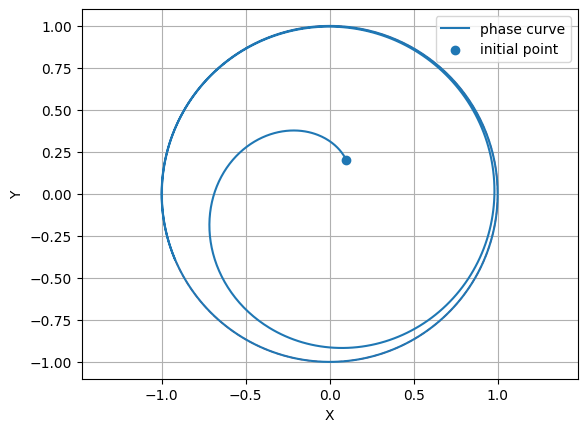

In [27]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt 

# Define the system of ODEs: x'' + x = 0, rewritten as a system of first-order equations
# Let x = u[0] and y = u[1] (where y = dx/dt)
def f(u, t):  # u = [x, y], t = time
    x, y = u
    dxdt = x*(1-np.sqrt(x**2+y**2)) -y
    dydt = y*(1-np.sqrt(x**2+y**2)) +x
    return [dxdt, dydt]

# Define the time range and initial conditions
t = np.linspace(0, 15, 1000)  # Time range
x0 = [0.1, 0.2]  # Initial conditions: [x(0), y(0)]

# Solve the system of ODEs
soln = odeint(f, x0, t)

# Plot the solution
plt.plot(t, soln[:, 0], label="x(t)")
plt.plot(t, soln[:, 1], label="y(t)", linestyle='dashed')
plt.title("Solution to the Harmonic Oscillator ODE")
plt.xlabel("Time")
plt.ylabel("Values of x and y")
plt.grid()
plt.legend()
plt.show()

plt.plot(soln[:, 0],soln[:, 1], label="phase curve")
plt.scatter(x0[0],x0[1], label = "initial point")
circle = plt.Circle((0, 0), 1, color='red', fill=False, linestyle='dashed')
plt.gca().add_patch(circle)
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.axis("equal")
plt.legend()
plt.show()